# 知识星球

In [ ]:
from WindPy import w
import sys
sys.path.append("..")
from call_model import call_model
import datetime
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
today = datetime.date.today()
#print(today)
w.start() # 默认命令超时时间为120秒，如需设置超时时间可以加入waitTime参数，例如waitTime=60,即设置命令超时时间为60秒 

w.isconnected() # 判断WindPy是否已经登录成功

Welcome to use Wind Quant API for Python (WindPy)!

COPYRIGHT (C) 2024 WIND INFORMATION CO., LTD. ALL RIGHTS RESERVED.
IN NO CIRCUMSTANCE SHALL WIND BE RESPONSIBLE FOR ANY DAMAGES OR LOSSES CAUSED BY USING WIND QUANT API FOR Python.


True

### 溴素
进口扰动，国内溴素供需或阶段性失衡。据百川资讯，目前国内溴素进口货源供应吃紧，根据我们与相关企业沟通，反馈主要系海外溴素供应商ICL部分装置出现故障，因而暂时无法向市场继续供货。ICL拥有溴素产能28万吨，占全球产能的30%以上。ICL是国内溴素主要进口货源提供商，2024年国内总共进口溴素7.66万吨，其中从以色列进口溴素4.43万吨，占当年总进口量的49.19%。从国内供需来看，据卓创资讯统计，2024年国内溴素表观消费量在14.02万吨，其中自产仅为6.35万吨，进口依赖度在50%以上。单四月份来看，2019-2024年国内溴素平均表观消费量在1.3万吨，以此测算，若4月份ICL无法向国内供应溴素，则国内单月供应缺口约为3000吨，国内溴素供需将阶段性失衡。
溴素价格或进入新一轮上涨周期。截至2025年3月25日，据百川资讯统计，国内溴素报价2.8万元/吨，同比+55.66%，相较于年初上涨30.23%。ICL暂缓对市场供应溴素，或导致国内溴素供需短暂失衡，带动国内溴素价格进入新一轮的上行周期。从历史价格来看，溴素价格历史最高价在近7万/吨，目前国内主要溴素产区山东地区部分供应商惜售，我们预计若供应问题短时间内无法缓解，溴素价格有望快速拉涨，价格上涨空间可观。

In [ ]:
begin = today - datetime.timedelta(days=30)
data_xiusu = w.edb(["S5470449"],str(begin), end_date=str(today),Fill="Previous",usedf = True)[1] #溴素

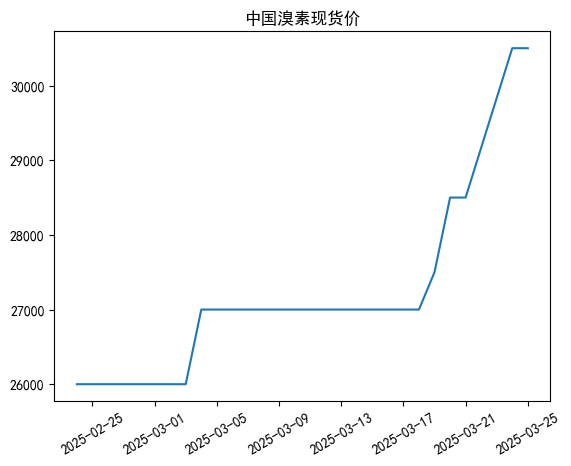

In [17]:
plt.plot(data_xiusu.index,data_xiusu.values)
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.title('中国溴素现货价')
plt.xticks(rotation = 30)
plt.savefig('plot_xiusu.png')#os.path.join(dir,'plot_xiusu.png')

prompt = f"""这是近一个月中国溴素现货价的数据：{data_xiusu}
任务：请根据上述结果分析判断近期所有可能存在的投资或套利机会和策略。
请使用Markdown格式回答，但不要用任何代码块（如 ```）包裹内容。
"""
data_xiusu.columns = ["中国溴素现货价"]
new_data = data_xiusu.to_markdown()
result = call_model(prompt)
result+="\n\n"+"![图](plot_xiusu.png)"
result+="\n\n"+new_data
with open("stragety_xiusu.md", "w", encoding="utf-8") as file:
            file.write(result)

### 国际磷肥和钾肥价格

In [ ]:
#数据暂时没找到

### 光伏
光伏级EVA价格，分布式光伏组件价格，光纤出口和光模块出口，硅料，硅片，电池片，光伏玻璃

In [ ]:
#数据暂时没找到

### 工业磷酸一铵价格

#数据暂时没找到

### 海关挖掘机出口数据和CME观测
昨晚把海关挖掘机出口数据整理出来了，这个出口数据包含了新机和二手机，协会公布的出口数据是新机的销量，两者相减就是二手机的出口数量。从图中可以看出，二手机从2020年初因为新冠疫情爆发，二手机短暂大量出口，随着国内经济的恢复，随后恢复到正常，但从2021年下半年开始，二手机出口持续高增长，一直持续到现在，并在2024年下半年再次加速，现在的出口同比增速高达50%以上，远远大于新机10%左右的增速。之所以在去年下半年二手机出口再次加速，可能和换机补贴有关。这个数据解释了挖掘机销量的高景气度和实际开工施工等数据的背离。
小松机械披露的数据：来自中国的6吨以上液压挖掘机持续增长，这是对中国挖掘机景气度上升的验证。

In [ ]:
data_waji = w.edb(["S6000153"],str(begin), end_date=str(today),Fill="Previous",usedf = True)[1] #中国挖掘机出口数量累计值
# 数据得自己找

### 机器人
#### 工业机器人和服务机器人
把服务机器人的数据补齐了，大家对照603486和688169的股价K线图，关联度还是非常高的。还是把两个股票的股价数据输进去了，做了一个对比图，发现石头科技和服务机器人的产量数据关联度更高，科沃斯股价明显和产量数据背离了，毕竟这是行业的数据，单个公司的市占率可能会有上升或者下降，也就是说，行业好转了，但是公司的销量不一定会好转多少。


In [18]:
begin = today - datetime.timedelta(days=365)
data_robot = w.edb(["S0243297","V5638475"],str(begin), end_date=str(today),Fill="Previous",usedf = True)[1] #溴素

In [21]:

prompt = f"""这是近一年中国工业机器人每月产量的数据：{data_robot["S0243297"]}
这是近一年中国服务机器人每月产量的数据：{data_robot["V5638475"]}
任务：请根据上述结果分析判断近期所有可能存在的投资或套利机会和策略。
请使用Markdown格式回答，但不要用任何代码块（如 ```）包裹内容。
"""
data_robot.columns = ["工业机器人产量","服务机器人产量"]
new_data = data_robot.to_markdown()
result = call_model(prompt)
result+="\n\n"+new_data
with open("stragety_robot.md", "w", encoding="utf-8") as file:
            file.write(result)

### 乳清及改性乳清

### 贵金属
#### 铜金比
铜金比从2008年后，每次跌破3.5的比值，都会起来，这次已经跌破了3..5，会再次起来吗？是不是可以赌一下做空黄金做多铜的对冲策略？
### 铜
#### 基金净多单和商业净多单
基金和商业净多单占比之差领先于铜价
### 金
#### swap_positions（紫） 和M_Money_Positions（蓝）
蓝上紫下，黄金价格上涨；紫上蓝下，黄金价格下跌
### COMEX黄金白银库存

### 内存
DRAM颗粒价格，闪存卡价格，颗粒

## 宏观
韩国出口金额和累计出口金额
### 出料贸易
所谓出料贸易，来料贸易正好相反，出料贸易就是两头在国内，加工在国外。这种贸易方式增长很快，对提高企业的利润有帮助，但是对国内的就业是不利的，这就是工作岗位正在外流。
### 国债
短期国债指数，2年期国债期货当月合约
中期国债指数，5年期国债期货当月合约
长期国债指数，10年期国债期货当月合约

### 债券发行金额

#### 中长期贷款 非金融性公司及其它部门贷款
央行资产负债表，信贷脉冲，mlf余额，本外币存款，人名币存款，本外币贷款，人名币贷款
### 低值简易通关商品
低值简易通关商品的规模已经达到了千亿美元的规模，今年1-2月的出口金额同比增速25.33%，远远大于整体的出口增速。这个商品可以理解为电商的出口商品，相关的股票仍然可以关注。
### 欧元区的制造业PMI
这是欧元区的制造业PMI，包括德国和法国这两个主要的欧元区经济体，正在回升。中国的经济周期和欧元区同步得比较好，随着俄乌战争的结束带来的重建和欧洲自建防务体系，都会带动欧元区制造业的回升。中国对欧洲出口的占比和对美国的出口占比差不多的体量，欧洲的复苏，也会带来中国对欧洲出口的增长，可以预计，中国的制造业PMI也会随着欧元区PMI的回升而上升。
### 美国房屋空置率数据
当出租房屋空置率趋势性上升的时候，美国联邦利率就会趋势性的下降，从1956年有这项数据以来都是如此，现在出租房屋的空置率是6.9%，整体房屋空置率在10.2%左右，金融海啸时期的空置率高达14.6%。

### 两融数据
总融资额，总融券额，合计当日净融资买入额，当日净融券卖出量，当日净融券余额
两市当日融资总买入金额，融资买入占比。
### 当月结售汇差额
北上净买入金额-南下净买入金额

## 工业原料
#### 美国 天然气库存
### 原油
商品原油+成品油库存，战略原油储备

### 主要工业产品日均产量
十种有色金属，乙烯，汽车，发电量，钢材，水泥，原油加工量，布，硫酸，烧碱

### 小金属
海绵钛价格,锶价,钴,锡，铟价，锑价，铋

### 锂电池和碳酸锂，铁锂电池的电解液价格